In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model 
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score


In [2]:
df = pd.read_csv(r"https://github.com/sriexp/Data-Analyst-Portfolio/raw/refs/heads/main/Linear%20Regression%20Model/Data/Ecommerce%20Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**About the Dataset**

* Email - Email address of the customer
* Avg. Session Length - the average duration of sessions (in Minutes) of Mobile and Website combined.
* Time on App - the total amount of time (in Minutes) that a customer spends using the mobile App application.
* Time on Website - the total amount of time (in Minutes) that a customer spends using the website.
* Length of Membership - the duration of membership or loyalty of each customer (in Months)
* Yearly Amount Spent - the total amount of money spent by each customer on the company's products in that year.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [5]:
# Cleanup column names

df.columns = df.columns.str.replace(' ','_').str.replace('.','')

df.rename({"Time_on_App": "App_Usage", 
                   "Time_on_Website": "Website_Usage",
                  "Length_of_Membership":"Membership_Length",
                  "Yearly_Amount_Spent": "Yearly_Spent"},
          axis=1,
          inplace=True)

In [6]:
df.head()

,Email,Address,Avatar,Avg_Session_Length,App_Usage,Website_Usage,Membership_Length,Yearly_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# EDA

## Correlation and heatmap

In [7]:
corr = df.corr(numeric_only=True)
corr

,Avg_Session_Length,App_Usage,Website_Usage,Membership_Length,Yearly_Spent
Avg_Session_Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
App_Usage,-0.027826,1.000000,0.082388,0.029143,0.499328
Website_Usage,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Membership_Length,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly_Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [8]:
# Filter out insignificant or near-zero correlation
corr[np.abs(corr) >= 0.1]

,Avg_Session_Length,App_Usage,Website_Usage,Membership_Length,Yearly_Spent
Avg_Session_Length,1.000000,NaN,NaN,NaN,0.355088
App_Usage,NaN,1.000000,NaN,NaN,0.499328
Website_Usage,NaN,NaN,1.0,NaN,NaN
Membership_Length,NaN,NaN,NaN,1.000000,0.809084
Yearly_Spent,0.355088,0.499328,NaN,0.809084,1.000000


<Axes: >

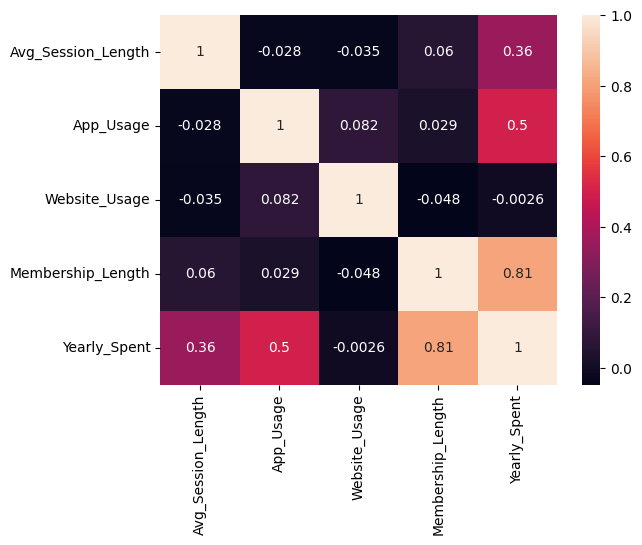

In [9]:
sns.heatmap(corr,annot=True)

## Joint plots

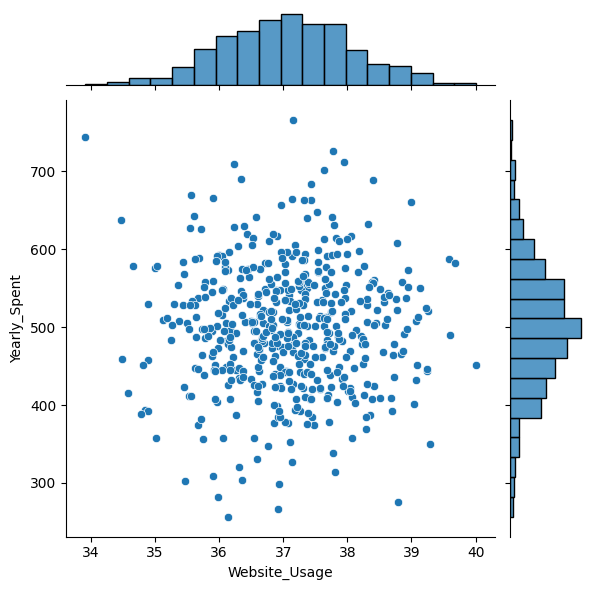

In [10]:
sns.jointplot(x='Website_Usage',y='Yearly_Spent',data=df)

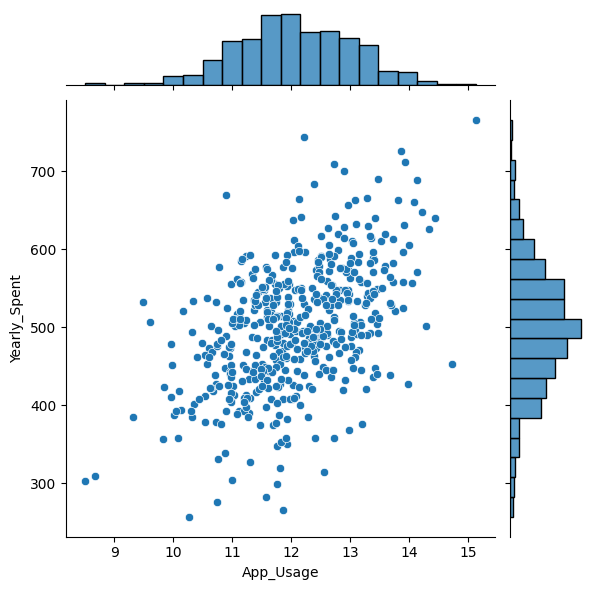

In [11]:
sns.jointplot(x='App_Usage',y='Yearly_Spent',data=df)

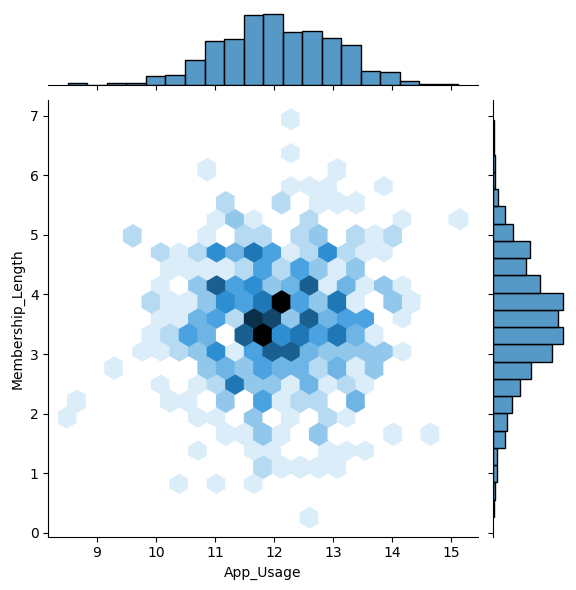

In [12]:
sns.jointplot(x='App_Usage',y='Membership_Length',data=df,kind='hex')

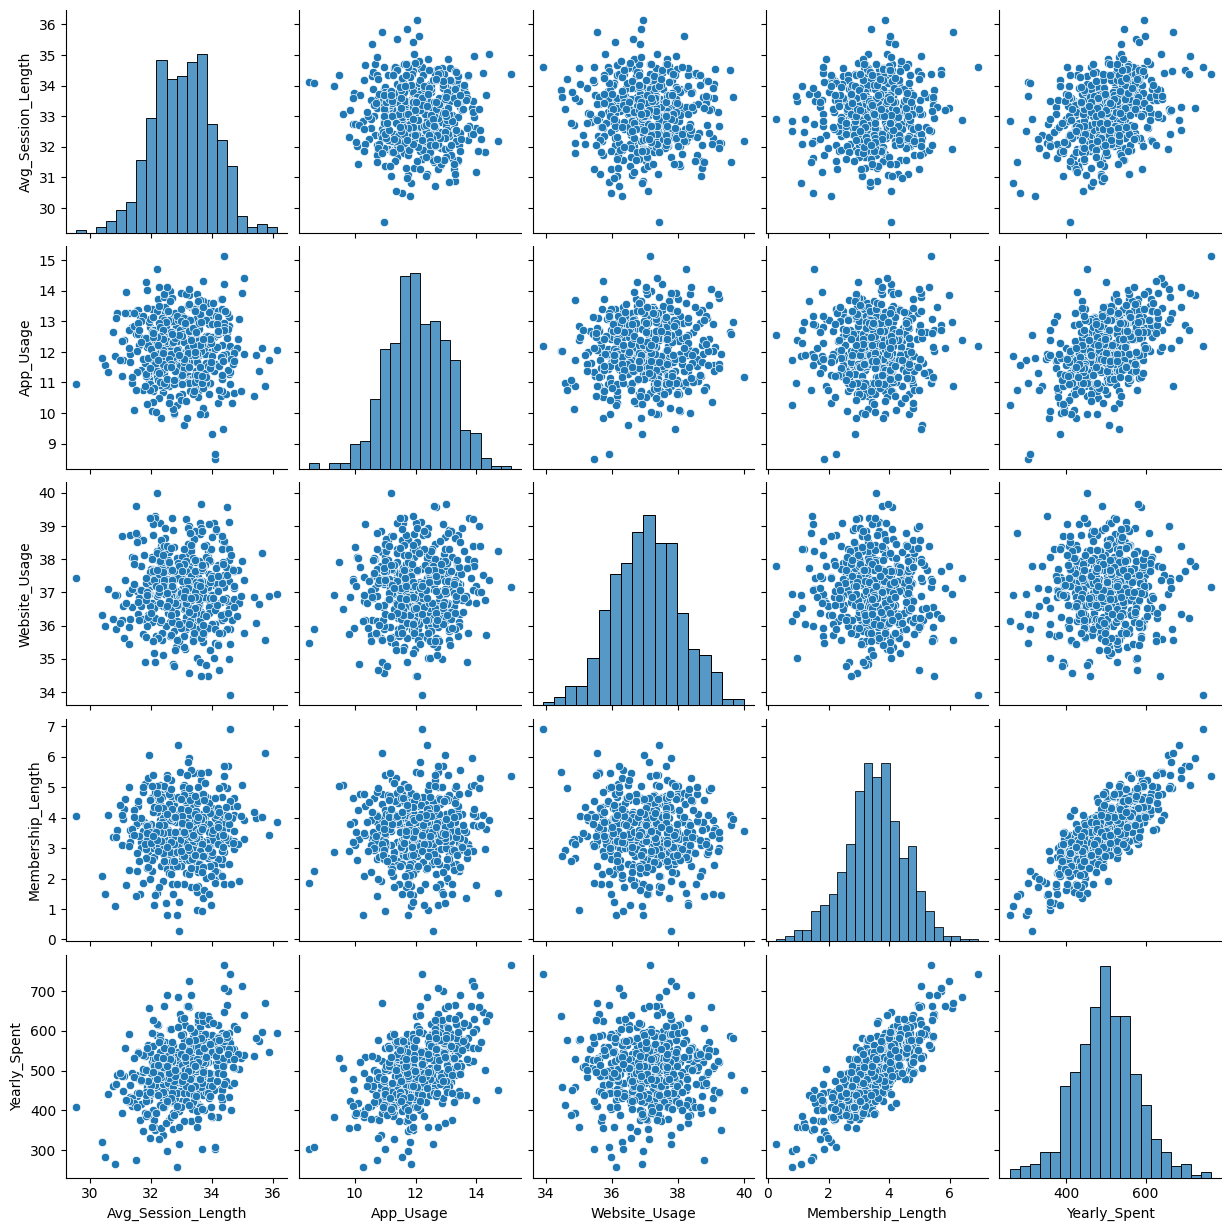

In [13]:
sns.pairplot(df)

Overall, it is clear that ```Yearly_Spent``` and ```Membership_Length``` have the highest positive correlation.

But also, there is moderate positive correlation between ```Yearly_Spent``` and ```App_Usage```
<br>And there is weak positive correlation between ```Yearly_Spent``` and ```Avg_Session_Length```

There is no correlation between the rest.

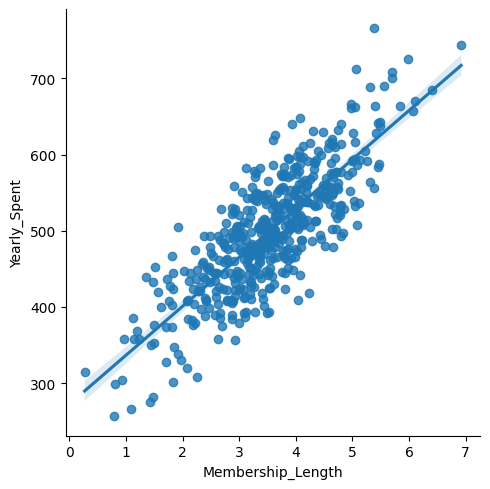

In [14]:
#Quick linear model between Yearly_Spent and Membership_Length

sns.lmplot(x='Membership_Length',y='Yearly_Spent',data=df)

# Training the Model

## Training and Testing Data

In [15]:
X = df[['Avg_Session_Length', 'App_Usage', 'Website_Usage', 'Membership_Length']]
y = df['Yearly_Spent']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=38)

In [17]:
X_train.head()

,Avg_Session_Length,App_Usage,Website_Usage,Membership_Length
482,30.971676,11.731364,36.074551,4.426364
260,35.039283,14.426491,37.374184,3.930615
46,34.564558,13.146551,37.335446,3.876875
334,31.976480,10.757131,36.595868,1.977007
469,31.169507,13.970181,36.673953,1.785174


## Building the Model

In [18]:
model = linear_model.LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.coef_

array([25.45380431, 38.79085534,  0.22021946, 61.48950341])

## Predicting Test Data

In [21]:
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

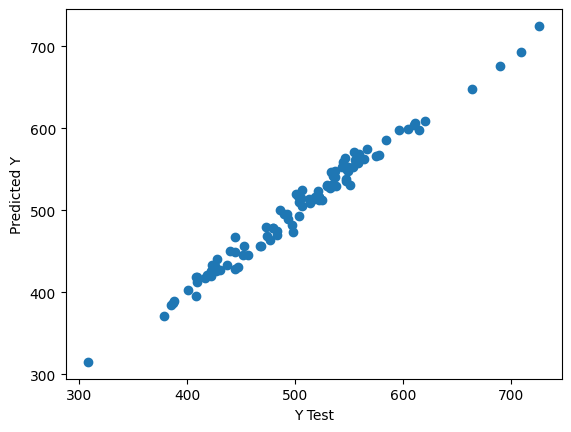

In [22]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [23]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   7.706089943234571
MSE :   92.36260871292967
RMSE :   9.610546743704527


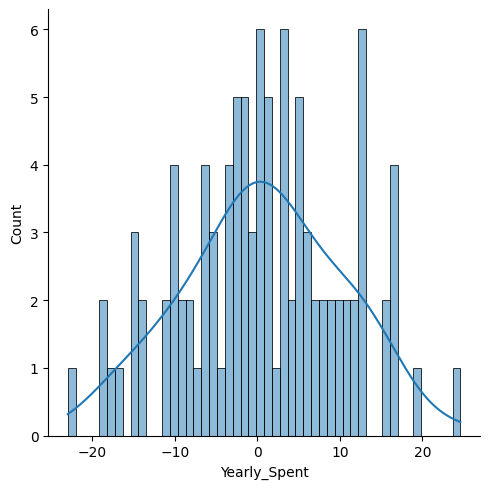

In [24]:
sns.displot(y_test - predictions,kde=True,bins=50)

In [25]:
pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])

,Coefficient
Avg_Session_Length,25.453804
App_Usage,38.790855
Website_Usage,0.220219
Membership_Length,61.489503


Interpretation:

* When all other variables are fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 dollars spent.
* When all other variables are fixed, a 1 unit increase in App Usage is associated with an increase of 38.59 dollars spent.
* When all other variables are fixed, a 1 unit increase in Website Usage is associated with an increase of 0.19 dollars spent.
* When all other variables are fixed, a 1 unit increase in Membership Lenght is associated with an increase of 61.27 dollars spent.

Hence, on the face of it, it seems like the mobile app is working better and results in more revenue. Either the company must upgrade the website and correct any bugs there so it can catch up with the mobile app, or alternatively, continue to improve the mobile app as it performs better.

Further analysis of mobile vs web app would be required to make better decisions. For instance, trying to understand why customers prefer mobile app over website, given they have access to both. Or does the website only serve as a springboard for uses to switch to the app when making their purchase, and so on.